In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [7]:
df.shape

(319795, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## A: Exploratory Data Analysis

C:\Users\harbohra\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

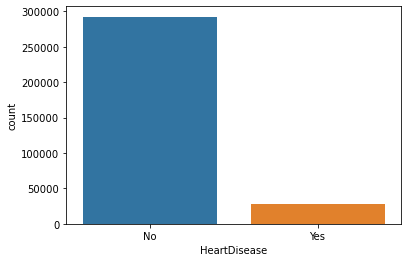

In [9]:
sns.countplot(df['HeartDisease'])

Data is extremely unbalanced

### (i) exploring continuous features

In [10]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


C:\Users\harbohra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harbohra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harbohra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

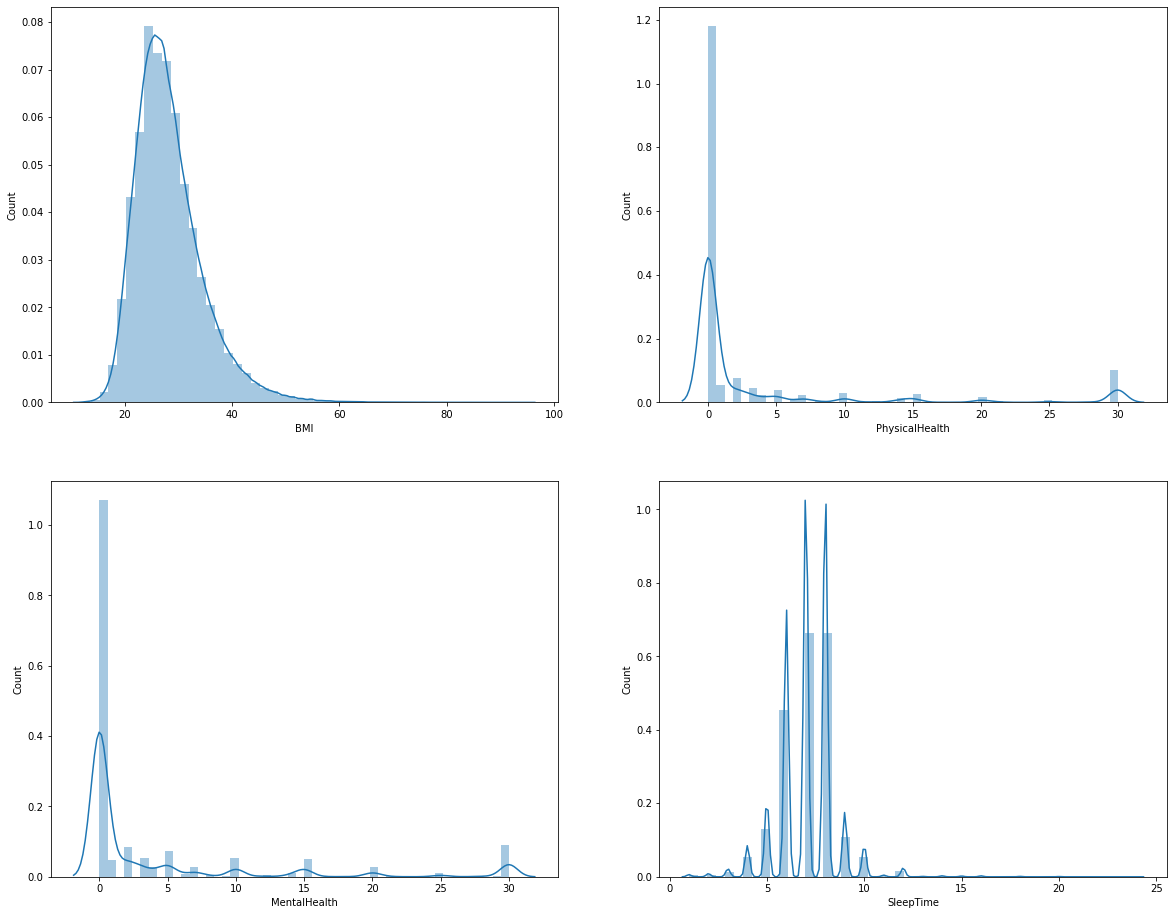

In [11]:
i=1
plt.figure(figsize = (20,16))
for col in df.select_dtypes(include='float64'):
    plt.subplot(2,2,i)
    sns.distplot(df[col],kde=True)
    plt.xlabel(col)
    plt.ylabel("Count")
    i+=1

We can see that BMI and SleepTime have somewhat of a normal distribution (right skewed).
PhysicalHealth and MentalHealth have a lot of outliers.

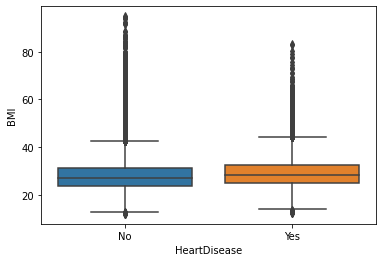

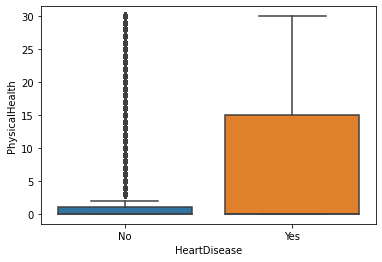

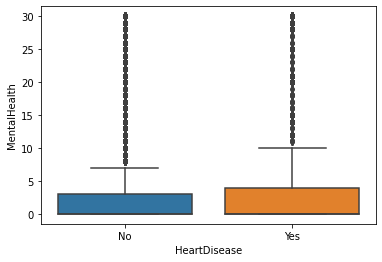

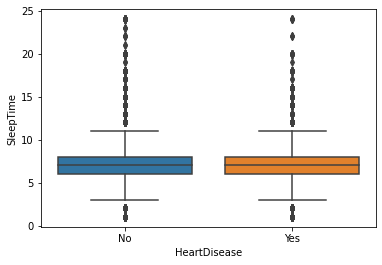

In [12]:
for col in df.select_dtypes(include='float64'):
    sns.boxplot(y=col, x='HeartDisease', data=df)
    plt.show()

### (ii) exploring categorical features

In [13]:
df.describe(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


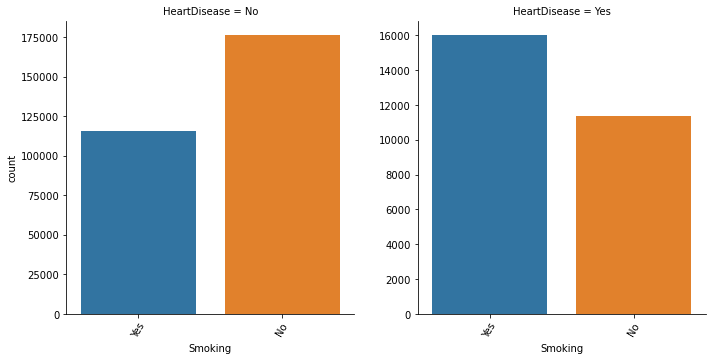

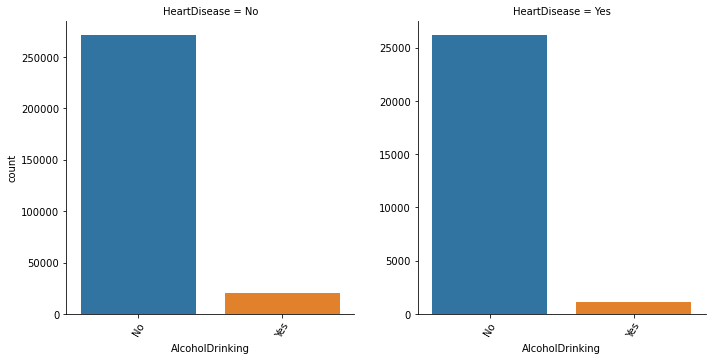

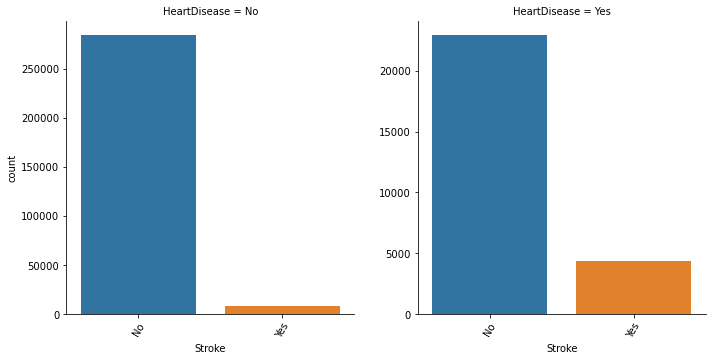

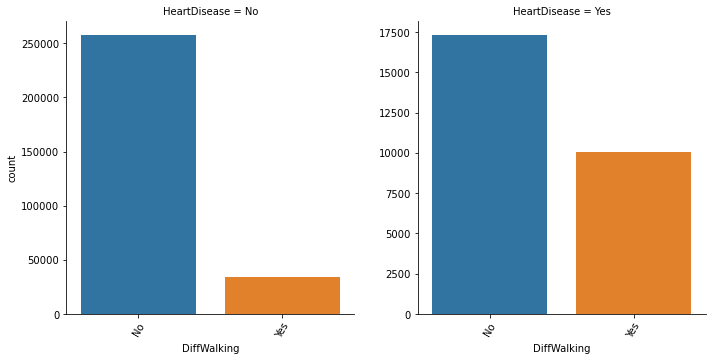

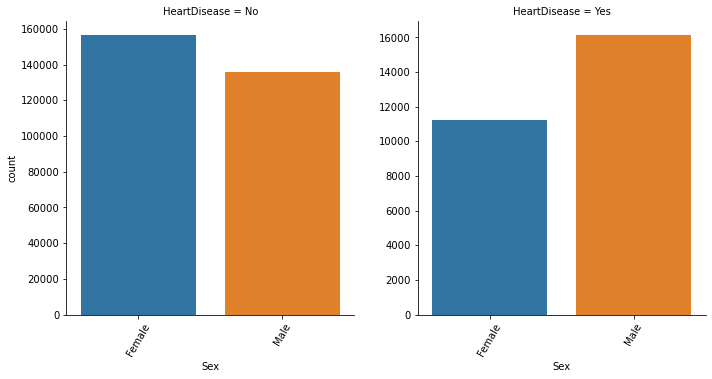

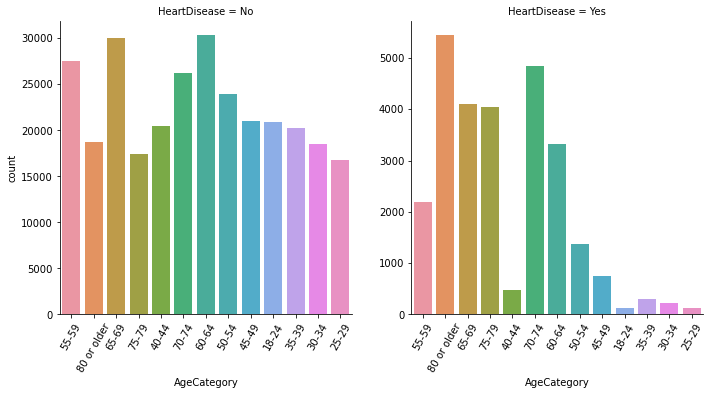

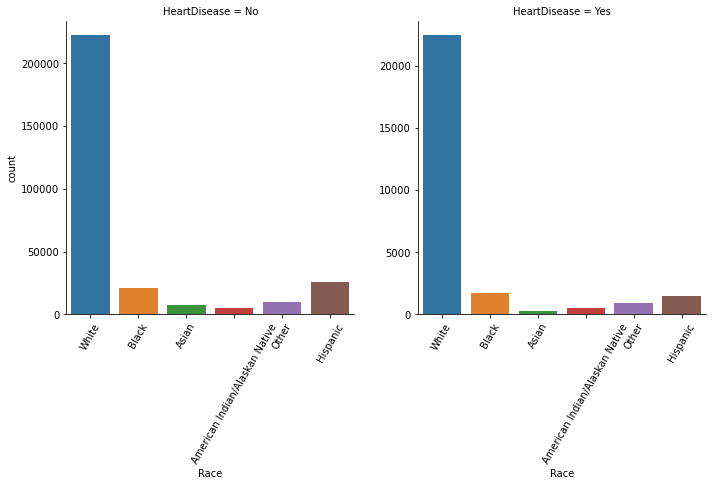

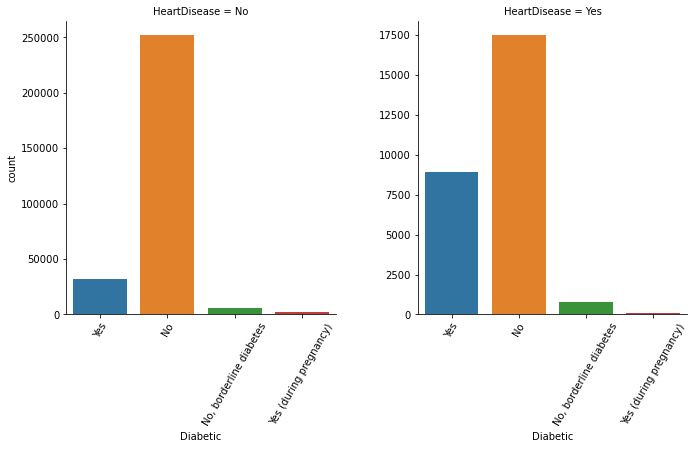

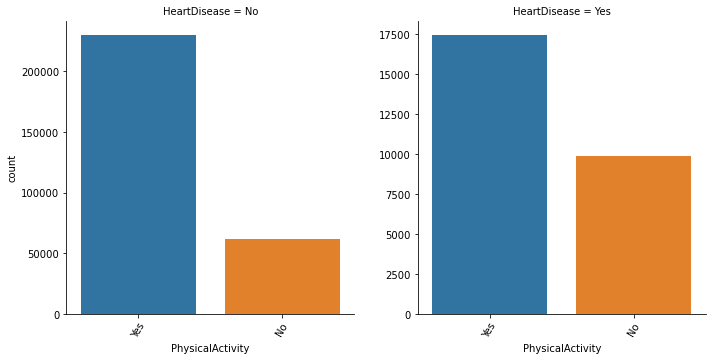

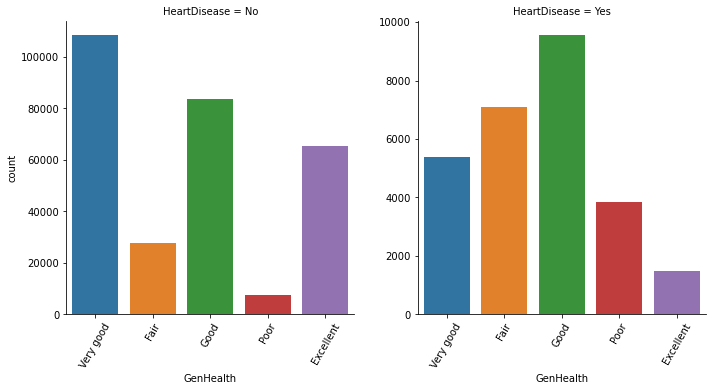

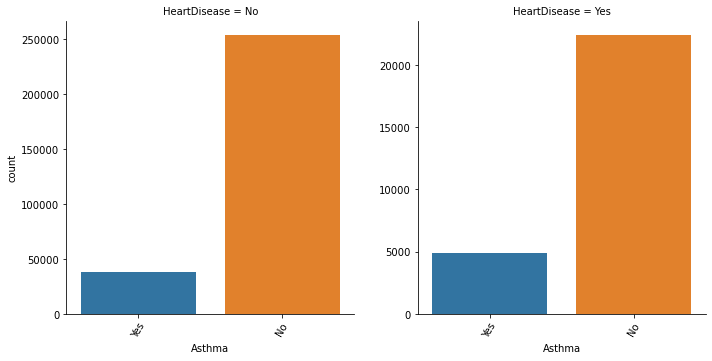

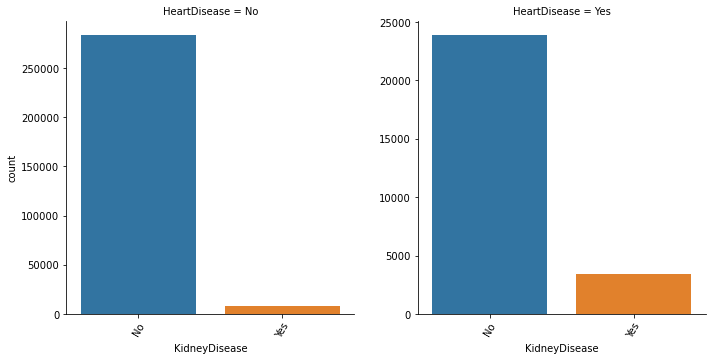

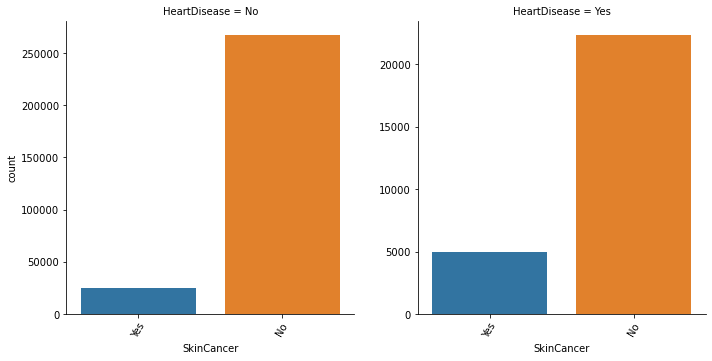

In [14]:
for col in df.select_dtypes(include='object').drop(['HeartDisease'], axis=1):
    g = sns.catplot(x=col, col='HeartDisease', kind='count', data=df, sharey=False)
    g.set_xticklabels(rotation=60)

## B: Data Preprocessing

### (i) missing value analysis

In [15]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

No missing values found

### (ii) duplicates

In [16]:
print("Initial shape:", df.shape)
print("Duplicates in dataset:", df.duplicated().sum())

Initial shape: (319795, 18)
Duplicates in dataset: 18078


Duplicates found, we will drop these rows

In [17]:
df.drop_duplicates(inplace=True)

print("New shape:", df.shape)
print("Duplicates in dataset:", df.duplicated().sum())

New shape: (301717, 18)
Duplicates in dataset: 0


### (iii) outlier analysis

In [18]:
continuous_vars=df.select_dtypes('float64').columns
print(continuous_vars)
categorical_vars=df.select_dtypes('object').columns
print(categorical_vars)

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')
Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


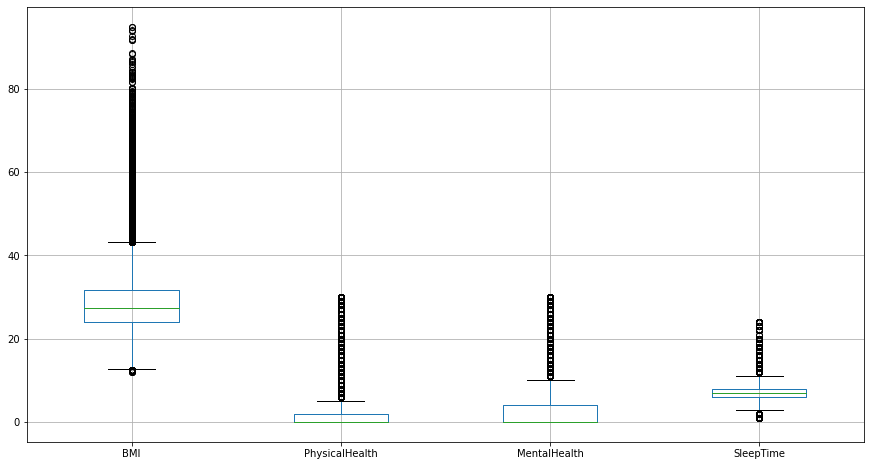

In [19]:
plt.figure(figsize=(15,8))
df.boxplot(column=list(continuous_vars))
plt.show()

In [20]:
def outlier_lims(col):
    q3,q1 = np.percentile(col, [75,25])
    iqr = q3-q1
    upper_lim = q3 + 1.5*iqr
    lower_lim = q1 - 1.5*iqr
    return upper_lim, lower_lim

In [21]:
for col in continuous_vars:
    print("Column:", col)
    UL,LL = outlier_lims(df[col])
    print("Upper Limit =", UL)
    print("Lower Limit =", LL)
    total_outliers = len(df.loc[df[col]<LL,col]) + len(df.loc[df[col]>UL,col])
    #df.loc[df[col]<LL,col]=np.nan
    #df.loc[df[col]>UL,col]=np.nan
    percent = (total_outliers / len(df.index) )*100
    print("Percentage of Outliers=", percent)
    print("------------------------- \n")

Column: BMI
Upper Limit = 43.08
Lower Limit = 12.600000000000005
Percentage of Outliers= 2.9514412512387436
------------------------- 

Column: PhysicalHealth
Upper Limit = 5.0
Lower Limit = -3.0
Percentage of Outliers= 15.622586728623181
------------------------- 

Column: MentalHealth
Upper Limit = 10.0
Lower Limit = -6.0
Percentage of Outliers= 13.162334240364315
------------------------- 

Column: SleepTime
Upper Limit = 11.0
Lower Limit = 3.0
Percentage of Outliers= 1.5053841845172795
------------------------- 



* For BMI and SleepTime, % of outliers is very low => can delete those records
* For PhysicalHeath and MentalHealth, % of outliers is too great to delete records

In [22]:
df.skew()

C:\Users\harbohra\AppData\Local\Temp\ipykernel_13616\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


BMI               1.297737
PhysicalHealth    2.501000
MentalHealth      2.237470
SleepTime         0.697224
dtype: float64

In [23]:
df.shape

(301717, 18)

PhysicalHealth and MentalHealth are greately positively skewed => can apply log transformation

In [24]:
#dropping records for BMI and SleepTime outliers
for col in ['BMI', 'SleepTime']:
    UL,LL = outlier_lims(df[col])
    df.loc[df[col]<LL,col]=np.nan
    df.loc[df[col]>UL,col]=np.nan

df.dropna(subset=['BMI', 'SleepTime'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [25]:
#using log transformation for PhysicalHealth and MentalHealth
df[['PhysicalHealth','MentalHealth']] = np.log1p(df[['PhysicalHealth','MentalHealth']])

In [26]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,1.386294,3.433987,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.000000,0.000000,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,3.044522,3.433987,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.000000,0.000000,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,3.367296,0.000000,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288491,No,23.38,No,No,No,0.000000,0.000000,No,Female,60-64,Hispanic,No,Yes,Excellent,6.0,No,No,No
288492,No,22.22,No,No,No,0.000000,0.000000,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
288493,Yes,27.41,Yes,No,No,2.079442,0.000000,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
288494,No,29.84,Yes,No,No,0.000000,0.000000,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No


In [27]:
df.skew()

C:\Users\harbohra\AppData\Local\Temp\ipykernel_13616\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


BMI               0.489741
PhysicalHealth    1.565659
MentalHealth      1.150896
SleepTime        -0.274924
dtype: float64

Skewness has been reduced for all 4 features

### (iv) feature selection

#### (continuous)

                     BMI  PhysicalHealth  MentalHealth  SleepTime
BMI             1.000000        0.075499      0.015184  -0.055475
PhysicalHealth  0.075499        1.000000      0.266002  -0.098170
MentalHealth    0.015184        0.266002      1.000000  -0.148908
SleepTime      -0.055475       -0.098170     -0.148908   1.000000


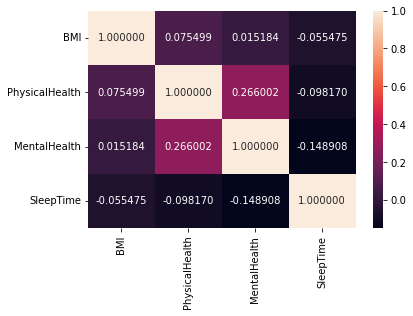

In [28]:
df_corr=df.select_dtypes(include='float64').corr()
print(df_corr)
sns.heatmap(df_corr, annot=True, fmt="f")
plt.show()

This shows that PhysicalHealth and MentalHealth are related. However, none of these values are high enough to drop a feature altogether.

#### (categorical)

In [29]:
from scipy.stats import chi2_contingency
for col in categorical_vars[1:]:
    data_crosstab = pd.crosstab(df['HeartDisease'], df[col],)
    print(data_crosstab,"\n")
    c, p, dof, expected = chi2_contingency(data_crosstab)
    if p<.05:
        comment="There is a significant association between those varibles "
    else:
        comment="There is no association those varibles"
    print('--> P-value is',p,"\n-->",comment,"\n")

Smoking           No     Yes
HeartDisease                
No            156499  106469
Yes            10565   14963 

--> P-value is 0.0 
--> There is a significant association between those varibles  

AlcoholDrinking      No    Yes
HeartDisease                  
No               243074  19894
Yes               24466   1062 

--> P-value is 5.510264590614578e-89 
--> There is a significant association between those varibles  

Stroke            No   Yes
HeartDisease              
No            255768  7200
Yes            21523  4005 

--> P-value is 0.0 
--> There is a significant association between those varibles  

DiffWalking       No    Yes
HeartDisease               
No            232543  30425
Yes            16650   8878 

--> P-value is 0.0 
--> There is a significant association between those varibles  

Sex           Female    Male
HeartDisease                
No            141278  121690
Yes            10319   15209 

--> P-value is 0.0 
--> There is a significant associati

All the features affect the target variable (HeartDisease), hence can not be dropped

### (v) encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
data=df.copy()
le = LabelEncoder()
col = data[['HeartDisease', 'Smoking', 'AlcoholDrinking','AgeCategory', 'Stroke', 'DiffWalking','Race', 'Sex','PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','GenHealth' ,'Diabetic']]
for i in col:
    data[i] = le.fit_transform(data[i])
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,1.386294,3.433987,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.000000,0.000000,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,3.044522,3.433987,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.000000,0.000000,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,3.367296,0.000000,1,0,4,5,0,1,4,8.0,0,0,0


### (vi) standardisation

In [31]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
data[cols] = std_scaler.fit_transform(data[cols])

In [32]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-2.084999,1,0,0,0.707383,2.325916,0,0,7,5,2,1,4,-1.636283,1,0,1
1,0,-1.389973,0,0,1,-0.571605,-0.678373,0,0,12,5,0,1,4,-0.041730,0,0,0
2,0,-0.230359,1,0,0,2.237255,2.325916,0,1,9,5,2,1,1,0.755547,1,0,0
3,0,-0.670789,0,0,0,-0.571605,-0.678373,0,0,11,5,0,0,2,-0.839007,0,0,1
4,0,-0.763707,0,0,0,2.535044,-0.678373,1,0,4,5,0,1,4,0.755547,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288491,0,-0.825033,0,0,0,-0.571605,-0.678373,0,0,8,3,0,1,0,-0.839007,0,0,0
288492,0,-1.040602,0,0,0,-0.571605,-0.678373,0,0,0,3,0,1,0,0.755547,0,0,0
288493,1,-0.076115,1,0,0,1.346876,-0.678373,1,1,8,3,2,0,1,-0.839007,1,0,0
288494,0,0.375465,1,0,0,-0.571605,-0.678373,0,1,3,3,0,1,4,-1.636283,1,0,0


### (vii) train test split

In [33]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(data, test_size=0.2)

In [34]:
training_data.reset_index(inplace=True, drop=True)
training_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.797312,1,0,0,2.596573,-0.678373,1,0,6,5,0,0,1,-1.636283,0,0,0
1,1,1.079783,0,0,1,2.596573,-0.678373,1,1,6,5,2,1,3,-0.041730,0,0,0
2,0,-0.581588,1,0,0,-0.571605,-0.678373,1,0,12,5,0,0,4,-0.839007,0,0,0
3,1,1.509063,0,0,1,2.596573,-0.678373,1,1,10,5,0,1,3,-1.636283,0,0,0
4,0,-0.403186,0,0,0,-0.571605,0.282769,0,0,1,2,0,0,4,0.755547,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230791,0,-1.363956,1,0,0,-0.571605,0.889182,0,0,8,5,0,1,4,-0.041730,0,0,0
230792,0,-1.137237,0,0,0,-0.571605,-0.678373,0,1,5,5,0,1,4,-0.041730,0,0,0
230793,0,0.962706,1,1,0,-0.571605,0.282769,0,1,2,5,0,1,4,-0.041730,1,0,0
230794,0,-0.066823,1,0,0,-0.571605,-0.678373,0,1,5,5,0,0,4,-0.041730,0,0,0


In [35]:
testing_data.reset_index(inplace=True, drop=True)
testing_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.696961,1,0,0,-0.571605,-0.678373,0,1,6,5,0,1,2,-0.041730,0,0,0
1,1,-0.343719,1,0,1,-0.571605,-0.678373,0,0,11,5,0,1,2,0.755547,0,0,0
2,0,-0.648489,0,0,0,-0.571605,-0.678373,0,1,1,5,0,1,0,0.755547,0,0,0
3,0,-0.100274,1,0,0,-0.571605,0.534453,0,0,11,5,0,0,2,0.755547,0,0,0
4,0,-1.302630,0,0,0,-0.571605,-0.678373,0,0,11,5,0,1,2,0.755547,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57695,0,0.756429,1,0,0,2.596573,1.747279,1,0,4,2,0,1,1,0.755547,0,0,0
57696,0,-0.516546,1,0,0,-0.571605,-0.678373,0,1,7,5,0,1,0,-0.041730,0,0,0
57697,0,-0.369736,1,0,0,-0.571605,-0.678373,0,1,4,5,0,1,0,-0.041730,0,0,0
57698,0,0.262106,1,0,0,-0.571605,1.747279,0,0,7,5,0,1,2,0.755547,0,0,0


### (viii) class balancing

In [36]:
# class count
class_count_0, class_count_1 = training_data['HeartDisease'].value_counts()

# Separate class
class_0 = training_data[training_data['HeartDisease'] == 0]
class_1 = training_data[training_data['HeartDisease'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (210407, 18)
class 1: (20389, 18)


Following are the methods to balance the data
* Random under-sampling
* Random over-sampling
* Under-sampling with Tomek links 
* Synthetic Minority Over-sampling Technique (SMOTE)
* NearMiss
* Cluster Centroids


#### (1. random under-sampling)

Total counts of class 1 and 0:
0    20389
1    20389
Name: HeartDisease, dtype: int64


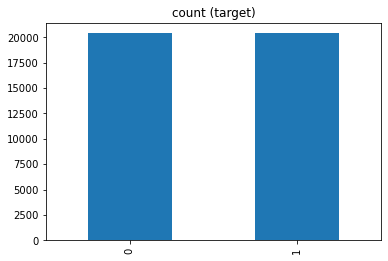

In [37]:
# taking sample from class_0 such that both have the quantity of minority class, i.e. class_1
class_0_under = class_0.sample(class_count_1)

training_data_1= pd.concat([class_0_under, class_1], axis=0)

# plot the count after under-sampling
print("Total counts of class 1 and 0:")
print(training_data_1['HeartDisease'].value_counts())
training_data_1['HeartDisease'].value_counts().plot(kind='bar', title='count (target)')
plt.show()

In [38]:
training_data_1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
71022,0,-0.066823,1,0,0,2.596573,-0.678373,1,1,5,5,0,0,3,2.350100,0,0,0
172907,0,-0.245226,1,0,0,2.596573,2.325916,1,1,10,4,0,0,3,0.755547,0,0,0
21286,0,-0.289826,1,0,0,0.707383,-0.678373,1,0,7,0,3,1,1,-0.041730,0,0,0
172413,0,-0.561146,0,1,0,-0.571605,-0.678373,1,0,11,3,1,1,1,0.755547,0,0,0
194867,0,-1.419707,1,0,0,-0.571605,-0.678373,0,0,8,5,0,1,2,0.755547,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230742,1,0.273256,1,0,0,0.441969,-0.678373,0,1,12,5,0,0,1,1.552824,0,0,1
230750,1,0.999873,0,0,0,-0.571605,-0.678373,0,0,9,5,0,1,2,0.755547,1,0,0
230761,1,0.013086,1,0,0,-0.571605,-0.678373,0,1,11,5,0,1,4,-0.041730,0,0,0
230770,1,0.198922,0,0,0,-0.571605,-0.678373,0,1,11,5,0,1,4,-0.041730,0,0,0


#### (2. random over-sampling)

Total counts of class 1 and 0:
1    210407
0    210407
Name: HeartDisease, dtype: int64


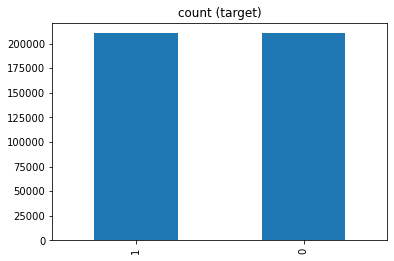

In [39]:
# taking sample from class_1 such that both have the quantity of majority class, i.e. class_0
class_1_over = class_1.sample(class_count_0, replace=True)

training_data_2 = pd.concat([class_1_over, class_0], axis=0)

# plot the count after over-sampling
print("Total counts of class 1 and 0:")
print(training_data_2['HeartDisease'].value_counts())
training_data_2['HeartDisease'].value_counts().plot(kind='bar', title='count (target)')
plt.show()

In [40]:
training_data_2

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
161633,1,0.483250,1,0,0,2.566321,2.297229,1,1,9,3,2,0,3,-1.636283,0,1,0
139418,1,-0.966268,0,0,1,-0.571605,1.419471,0,0,12,5,2,1,1,2.350100,0,0,0
79692,1,-0.704240,1,0,0,-0.571605,0.889182,0,0,9,5,0,1,2,0.755547,0,0,0
202580,1,-0.851050,0,0,0,2.434297,-0.678373,0,0,7,4,0,1,0,0.755547,1,0,0
131165,1,-0.633622,1,0,0,1.081462,-0.678373,0,1,10,2,2,1,1,-0.041730,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230791,0,-1.363956,1,0,0,-0.571605,0.889182,0,0,8,5,0,1,4,-0.041730,0,0,0
230792,0,-1.137237,0,0,0,-0.571605,-0.678373,0,1,5,5,0,1,4,-0.041730,0,0,0
230793,0,0.962706,1,1,0,-0.571605,0.282769,0,1,2,5,0,1,4,-0.041730,1,0,0
230794,0,-0.066823,1,0,0,-0.571605,-0.678373,0,1,5,5,0,0,4,-0.041730,0,0,0


#### (3. under-sampling with Tomek links)

Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

Tomek’s link exists if the two samples are the nearest neighbors of each other
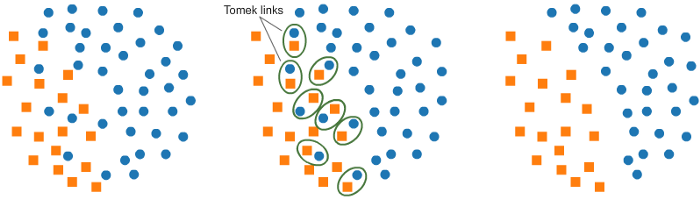

In [41]:
x = training_data.drop(['HeartDisease'], axis=1)
y = training_data['HeartDisease'] 

In [42]:
import imblearn
from imblearn.under_sampling import TomekLinks
from collections import Counter

tl = TomekLinks()

# fit predictor and target variable
x_tl, y_tl = tl.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_tl))

training_data_3 = pd.concat([y_tl, x_tl], axis=1)

Original dataset shape Counter({0: 210407, 1: 20389})
Resample dataset shape Counter({0: 203478, 1: 20389})


In [43]:
training_data_3

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.797312,1,0,0,2.596573,-0.678373,1,0,6,5,0,0,1,-1.636283,0,0,0
1,1,1.079783,0,0,1,2.596573,-0.678373,1,1,6,5,2,1,3,-0.041730,0,0,0
2,0,-0.581588,1,0,0,-0.571605,-0.678373,1,0,12,5,0,0,4,-0.839007,0,0,0
3,1,1.509063,0,0,1,2.596573,-0.678373,1,1,10,5,0,1,3,-1.636283,0,0,0
4,0,-0.403186,0,0,0,-0.571605,0.282769,0,0,1,2,0,0,4,0.755547,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223862,0,-1.363956,1,0,0,-0.571605,0.889182,0,0,8,5,0,1,4,-0.041730,0,0,0
223863,0,-1.137237,0,0,0,-0.571605,-0.678373,0,1,5,5,0,1,4,-0.041730,0,0,0
223864,0,0.962706,1,1,0,-0.571605,0.282769,0,1,2,5,0,1,4,-0.041730,1,0,0
223865,0,-0.066823,1,0,0,-0.571605,-0.678373,0,1,5,5,0,0,4,-0.041730,0,0,0


#### (4. synthetic minority over-sampling technique - SMOTE)

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

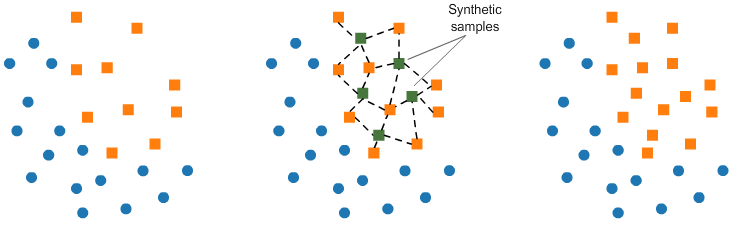

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

training_data_4 = pd.concat([y_smote, x_smote], axis=1)

Original dataset shape Counter({0: 210407, 1: 20389})
Resample dataset shape Counter({0: 210407, 1: 210407})


In [45]:
training_data_4

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.797312,1,0,0,2.596573,-0.678373,1,0,6,5,0,0,1,-1.636283,0,0,0
1,1,1.079783,0,0,1,2.596573,-0.678373,1,1,6,5,2,1,3,-0.041730,0,0,0
2,0,-0.581588,1,0,0,-0.571605,-0.678373,1,0,12,5,0,0,4,-0.839007,0,0,0
3,1,1.509063,0,0,1,2.596573,-0.678373,1,1,10,5,0,1,3,-1.636283,0,0,0
4,0,-0.403186,0,0,0,-0.571605,0.282769,0,0,1,2,0,0,4,0.755547,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420809,1,0.584735,0,0,1,2.114365,1.524173,1,0,5,5,0,1,1,0.265908,1,0,0
420810,1,0.281379,0,0,0,0.749826,-0.678373,0,1,8,5,0,1,2,0.479074,0,0,0
420811,1,1.586016,0,0,0,-0.571605,2.226200,0,0,8,4,0,1,4,-0.041730,1,0,0
420812,1,1.063822,0,0,0,-0.571605,-0.678373,0,0,1,0,0,0,0,0.755547,0,0,0


#### (5. NearMiss)

NearMiss is an under-sampling technique. Instead of resampling the Minority class, using a distance, this will make the majority class equal to the minority class.
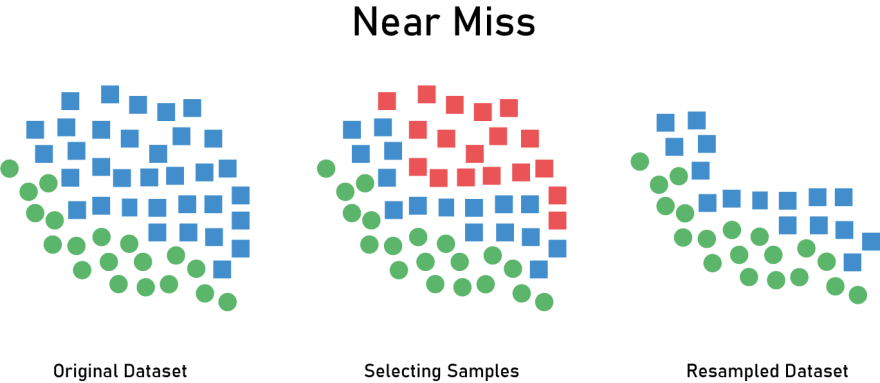

In [46]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

# fit predictor and target variable
x_nm, y_nm = nm.fit_resample(x, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

training_data_5 = pd.concat([y_nm, x_nm], axis=1)

Original dataset shape: Counter({0: 210407, 1: 20389})
Resample dataset shape: Counter({0: 20389, 1: 20389})


In [47]:
training_data_5

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-0.224784,0,0,0,-0.571605,-0.678373,0,1,9,5,0,1,4,-0.041730,0,0,0
1,0,-0.369736,0,0,0,-0.571605,-0.678373,0,1,12,5,0,1,4,0.755547,0,0,0
2,0,-0.366019,0,0,0,-0.571605,-0.678373,0,1,12,5,0,1,4,0.755547,0,0,0
3,0,-0.221067,0,0,0,-0.571605,-0.678373,0,1,9,5,0,1,4,-0.041730,0,0,0
4,0,-0.371594,0,0,0,-0.571605,-0.678373,0,1,12,5,0,1,4,0.755547,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40773,1,0.273256,1,0,0,0.441969,-0.678373,0,1,12,5,0,0,1,1.552824,0,0,1
40774,1,0.999873,0,0,0,-0.571605,-0.678373,0,0,9,5,0,1,2,0.755547,1,0,0
40775,1,0.013086,1,0,0,-0.571605,-0.678373,0,1,11,5,0,1,4,-0.041730,0,0,0
40776,1,0.198922,0,0,0,-0.571605,-0.678373,0,1,11,5,0,1,4,-0.041730,0,0,0


#### (6. Cluster centroids)

The idea here is basically to remove the unimportant instance from the majority class. To decide whether an instance is important or not, we use the concept of clustering on the geometry of the feature space.

After finding the cluster centroid of the majority class, we decide the following:
* The instance belonging to the cluster (majority class), which is farthest from the cluster centroid in the feature space, is considered to be the most unimportant instance.
* The instance belonging to the majority class, which is nearest to the cluster centroid in the feature space, is considered to be the most important instance.

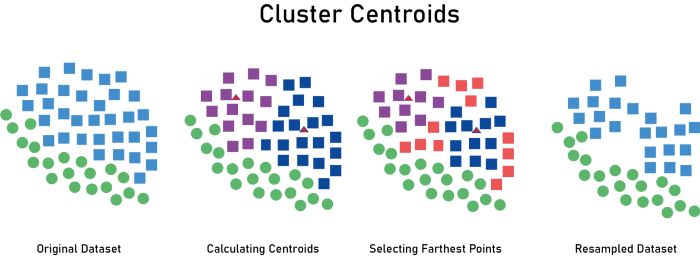

In [44]:
# from imblearn.under_sampling import ClusterCentroids

# cc = ClusterCentroids()

# # fit predictor and target variable
# x_cc, y_cc = cc.fit_resample(x, y)

# print('Original dataset shape:', Counter(y))
# print('Resample dataset shape:', Counter(y_cc))

# training_data_6 = pd.concat([y_cc, x_cc], axis=1)

In [45]:
# training_data_6

## C: Model Development

In this case, we have a supervised ML problem statement, falling into the classification group. This suggests using the following models:
* Logistic Regression
* Decision Tree
* Random Forest
* Support Vector Machine (SVM)
* K-Nearest Neighbour (KNN)
* Naive Bayes

Variable List:
* training_data     
    (Imbalanced)
* training_data_1   
    (Random Under-sampling)
* training_data_2   
    (Random Over-sampling)
* training_data_3   
    (Tomek)
* training_data_4   
    (SMOTE) 
* training_data_5   
    (NearMiss)


* testing_data

In [48]:
X_test = testing_data.drop(['HeartDisease'], axis=1)
y_test = testing_data['HeartDisease']
print("Shape of testing data: \t\t",X_test.shape, y_test.shape)

X_train = training_data.drop(['HeartDisease'], axis=1)
y_train = training_data['HeartDisease']
print("Shape of training data: \t",X_train.shape, y_train.shape, "(imbalanced data)")

X_train1 = training_data_1.drop(['HeartDisease'], axis=1)
y_train1 = training_data_1['HeartDisease']
print("Shape of training data-1: \t",X_train1.shape, y_train1.shape, "(Random Under-sampling)")

X_train2 = training_data_2.drop(['HeartDisease'], axis=1)
y_train2 = training_data_2['HeartDisease']
print("Shape of training data-2: \t",X_train2.shape, y_train2.shape, "(Random Over-sampling)")

X_train3 = training_data_3.drop(['HeartDisease'], axis=1)
y_train3 = training_data_3['HeartDisease']
print("Shape of training data-3: \t",X_train3.shape, y_train3.shape, "(Tomek)")

X_train4 = training_data_4.drop(['HeartDisease'], axis=1)
y_train4 = training_data_4['HeartDisease']
print("Shape of training data-4: \t",X_train4.shape, y_train4.shape, "(SMOTE)")

X_train5 = training_data_5.drop(['HeartDisease'], axis=1)
y_train5 = training_data_5['HeartDisease']
print("Shape of training data-5: \t",X_train5.shape, y_train5.shape, "(NearMiss)")

Shape of testing data: 		 (57700, 17) (57700,)
Shape of training data: 	 (230796, 17) (230796,) (imbalanced data)
Shape of training data-1: 	 (40778, 17) (40778,) (Random Under-sampling)
Shape of training data-2: 	 (420814, 17) (420814,) (Random Over-sampling)
Shape of training data-3: 	 (223867, 17) (223867,) (Tomek)
Shape of training data-4: 	 (420814, 17) (420814,) (SMOTE)
Shape of training data-5: 	 (40778, 17) (40778,) (NearMiss)


In [49]:
X_train_list = [X_train, X_train1, X_train2, X_train3, X_train4, X_train5]
y_train_list = [y_train, y_train1, y_train2, y_train3, y_train4, y_train5]
data_desc = ['imbalanced', 'Random Under-sampling', 'Random Over-sampling', 'Tomek', 'SMOTE', 'NearMiss']

* If we assess that errors caused by FPs are more undesirable, then we will select a model based on precision 
    * (Precision: Of all positive predictions, how many are really positive?)
* If we assess that errors caused by FNs are more undesirable, then we will select a model based on recall 
    * (Recall: Of all real positive cases, how many are predicted positive?)
* If we assess that both types of errors are undesirable, then we will select a model based on F1-score

In our case, leaving a patient with an undiagonsed condition of HeartDisease is more undesirable (i.e. FNs), hence **we will select model based on Recall**

### Logistic Regression

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

Model accuracy score: 0.9117
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     52564
           1       0.52      0.09      0.15      5136

    accuracy                           0.91     57700
   macro avg       0.72      0.54      0.55     57700
weighted avg       0.88      0.91      0.88     57700

Confusion Matrix:


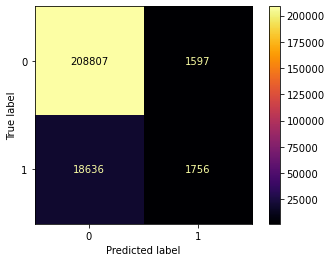



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 1 (RANDOM UNDER-SAMPLING):

Model accuracy score: 0.7321
Classification report:

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     52564
           1       0.22      0.76      0.34      5136

    accuracy                           0.73     57700
   macro avg       0.59      0.74      0.58     57700
weighted avg       0.90      0.73      0.79     57700

Confusion Matrix:


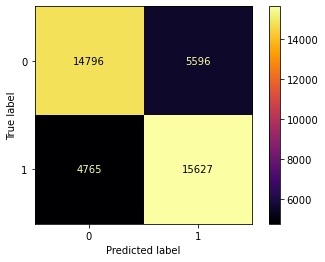



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 2 (RANDOM OVER-SAMPLING):

Model accuracy score: 0.7318
Classification report:

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     52564
           1       0.22      0.76      0.34      5136

    accuracy                           0.73     57700
   macro avg       0.59      0.75      0.58     57700
weighted avg       0.90      0.73      0.79     57700

Confusion Matrix:


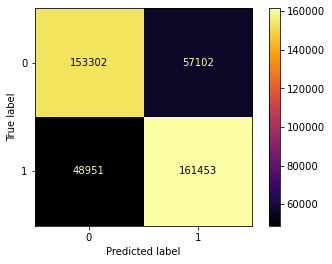



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 3 (TOMEK):

Model accuracy score: 0.9110
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     52564
           1       0.50      0.11      0.18      5136

    accuracy                           0.91     57700
   macro avg       0.71      0.55      0.57     57700
weighted avg       0.88      0.91      0.88     57700

Confusion Matrix:


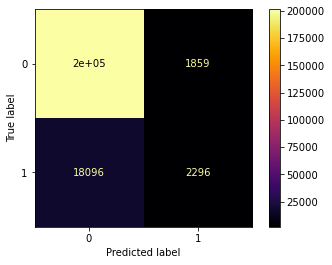



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 4 (SMOTE):

Model accuracy score: 0.6989
Classification report:

              precision    recall  f1-score   support

           0       0.97      0.69      0.81     52564
           1       0.19      0.76      0.31      5136

    accuracy                           0.70     57700
   macro avg       0.58      0.73      0.56     57700
weighted avg       0.90      0.70      0.76     57700

Confusion Matrix:


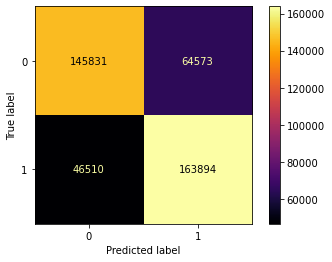



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 5 (NEARMISS):



C:\Users\harbohra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy score: 0.3593
Classification report:

              precision    recall  f1-score   support

           0       0.94      0.32      0.47     52564
           1       0.10      0.79      0.18      5136

    accuracy                           0.36     57700
   macro avg       0.52      0.55      0.33     57700
weighted avg       0.86      0.36      0.45     57700

Confusion Matrix:


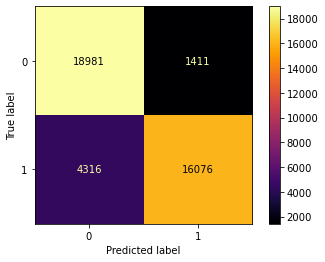

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score 
from sklearn.metrics import classification_report


for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    
    clf_LR= LogisticRegression(random_state=0).fit(X_train_list[i], y_train_list[i])
    
    pred = clf_LR.predict(X_test)
    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
    print("Classification report:\n")
    print(classification_report(y_test,pred))
    
    print("Confusion Matrix:") 
    ConfusionMatrixDisplay.from_estimator(clf_LR, X_train_list[i], y_train_list[i], cmap='inferno')
    plt.show()
    print("\n")


### Decision Tree

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

Model accuracy score: 0.9110
Classification report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     52564
           1       0.00      0.00      0.00      5136

    accuracy                           0.91     57700
   macro avg       0.46      0.50      0.48     57700
weighted avg       0.83      0.91      0.87     57700

Confusion Matrix:


C:\Users\harbohra\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harbohra\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harbohra\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


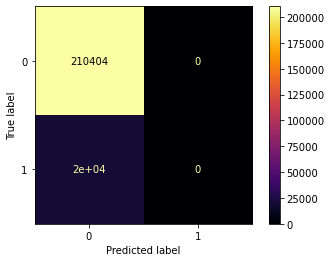



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 1 (RANDOM UNDER-SAMPLING):

Model accuracy score: 0.7301
Classification report:

              precision    recall  f1-score   support

           0       0.96      0.73      0.83     52564
           1       0.20      0.69      0.31      5136

    accuracy                           0.73     57700
   macro avg       0.58      0.71      0.57     57700
weighted avg       0.89      0.73      0.79     57700

Confusion Matrix:


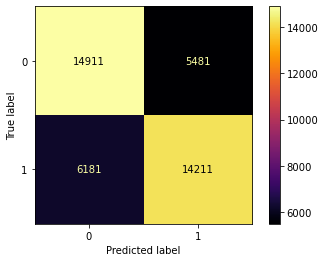



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 2 (RANDOM OVER-SAMPLING):

Model accuracy score: 0.7301
Classification report:

              precision    recall  f1-score   support

           0       0.96      0.73      0.83     52564
           1       0.20      0.69      0.31      5136

    accuracy                           0.73     57700
   macro avg       0.58      0.71      0.57     57700
weighted avg       0.89      0.73      0.79     57700

Confusion Matrix:


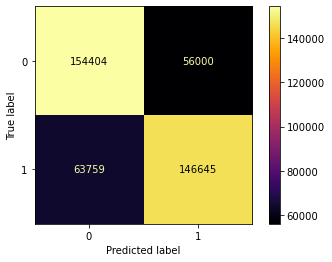



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 3 (TOMEK):

Model accuracy score: 0.9110
Classification report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     52564
           1       0.00      0.00      0.00      5136

    accuracy                           0.91     57700
   macro avg       0.46      0.50      0.48     57700
weighted avg       0.83      0.91      0.87     57700

Confusion Matrix:


C:\Users\harbohra\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harbohra\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harbohra\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


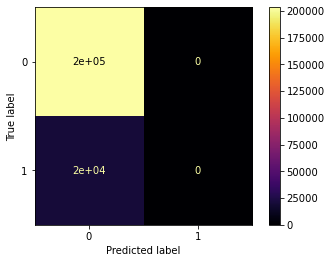



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 4 (SMOTE):

Model accuracy score: 0.7205
Classification report:

              precision    recall  f1-score   support

           0       0.96      0.72      0.82     52564
           1       0.20      0.70      0.31      5136

    accuracy                           0.72     57700
   macro avg       0.58      0.71      0.57     57700
weighted avg       0.89      0.72      0.78     57700

Confusion Matrix:


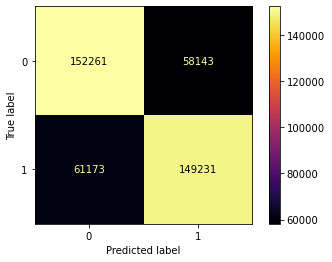



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 5 (NEARMISS):

Model accuracy score: 0.5318
Classification report:

              precision    recall  f1-score   support

           0       0.93      0.52      0.67     52564
           1       0.11      0.61      0.19      5136

    accuracy                           0.53     57700
   macro avg       0.52      0.57      0.43     57700
weighted avg       0.86      0.53      0.63     57700

Confusion Matrix:


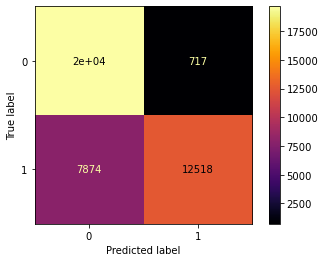

In [49]:
from sklearn.tree import DecisionTreeClassifier


for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    
    clf_dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0) 
    clf_dtc.fit(X_train_list[i], y_train_list[i])
        
    pred = clf_dtc.predict(X_test)
    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
    print("Classification report:\n")
    print(classification_report(y_test,pred))
    
    print("Confusion Matrix:") 
    ConfusionMatrixDisplay.from_estimator(clf_dtc, X_train_list[i], y_train_list[i], cmap='inferno')
    plt.show()
    print("\n")


### Random Forest

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

Model accuracy score: 0.9005
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     52564
           1       0.33      0.11      0.16      5136

    accuracy                           0.90     57700
   macro avg       0.62      0.54      0.56     57700
weighted avg       0.87      0.90      0.88     57700

Confusion Matrix:


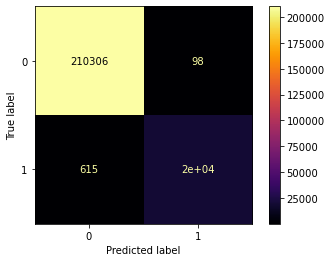



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 1 (RANDOM UNDER-SAMPLING):

Model accuracy score: 0.7156
Classification report:

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     52564
           1       0.20      0.76      0.32      5136

    accuracy                           0.72     57700
   macro avg       0.59      0.74      0.57     57700
weighted avg       0.90      0.72      0.78     57700

Confusion Matrix:


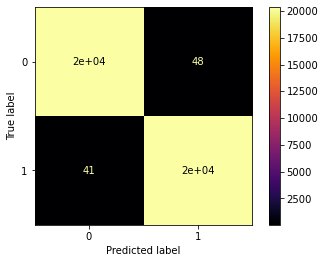



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 2 (RANDOM OVER-SAMPLING):

Model accuracy score: 0.8869
Classification report:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     52564
           1       0.30      0.21      0.25      5136

    accuracy                           0.89     57700
   macro avg       0.61      0.58      0.59     57700
weighted avg       0.87      0.89      0.88     57700

Confusion Matrix:


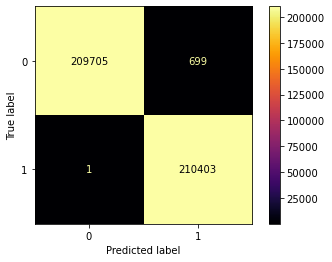



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 3 (TOMEK):

Model accuracy score: 0.8969
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     52564
           1       0.33      0.16      0.21      5136

    accuracy                           0.90     57700
   macro avg       0.63      0.56      0.58     57700
weighted avg       0.87      0.90      0.88     57700

Confusion Matrix:


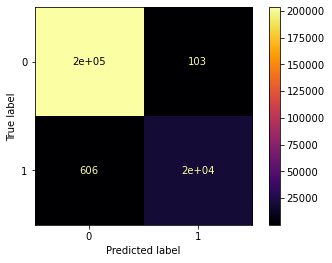



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 4 (SMOTE):

Model accuracy score: 0.8411
Classification report:

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     52564
           1       0.23      0.33      0.27      5136

    accuracy                           0.84     57700
   macro avg       0.58      0.61      0.59     57700
weighted avg       0.87      0.84      0.85     57700

Confusion Matrix:


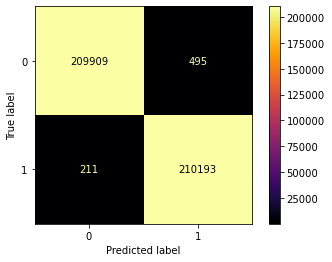



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 5 (NEARMISS):

Model accuracy score: 0.2168
Classification report:

              precision    recall  f1-score   support

           0       0.91      0.15      0.26     52564
           1       0.09      0.85      0.16      5136

    accuracy                           0.22     57700
   macro avg       0.50      0.50      0.21     57700
weighted avg       0.84      0.22      0.26     57700

Confusion Matrix:


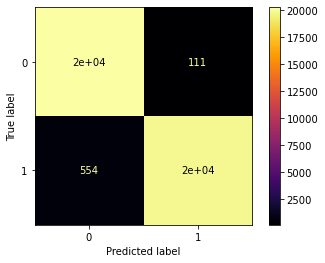

In [50]:
from sklearn.ensemble import  RandomForestClassifier


for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    
    clf_RF= RandomForestClassifier().fit(X_train_list[i], y_train_list[i])
        
    pred = clf_RF.predict(X_test)
    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
    print("Classification report:\n")
    print(classification_report(y_test,pred))
    
    print("Confusion Matrix:") 
    ConfusionMatrixDisplay.from_estimator(clf_RF, X_train_list[i], y_train_list[i], cmap='inferno')
    plt.show()
    print("\n")


### K-Nearest Neighbour (KNN)

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

2 : [0.9305447234787432, 0.9052166377816291]
3 : [0.9316495953136102, 0.8952686308492201]
4 : [0.9208868437927867, 0.9076776429809359]
5 : [0.9218747291980797, 0.9032409012131716]
6 : [0.9178755264389331, 0.908682842287695]
7 : [0.9183521378186797, 0.9066031195840555]
8 : [0.9161163971645956, 0.9094974003466204]
9 : [0.9167056621431914, 0.908370883882149]
10 : [0.9152541638503267, 0.9099826689774697]
11 : [0.9155574620010746, 0.9087521663778163]
12 : [0.9146302362259311, 0.9103812824956673]
13 : [0.9151458430822025, 0.9098613518197574]
14 : [0.9144959184734571, 0.9106932409012132]
15 : [0.9148728747465295, 0.9105545927209705]
16 : [0.9141406263540096, 0.9111091854419411]
17 : [0.9144699214891072, 0.9104679376083189]
18 : [0.9138416610339867, 0.9110571923743501]
19 : [0.9142099516456091, 0.9110745233968804]
20 : [0.9137246746044125, 0.9112998266897747]


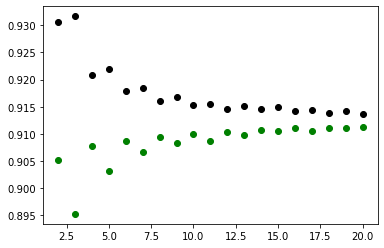

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 1 (RANDOM UNDER-SAMPLING):

2 : [0.826476069046685, 0.8022357019064125]
3 : [0.8368477834444881, 0.7104852686308493]
4 : [0.7984748921145547, 0.7784922010398614]
5 : [0.8034032954099647, 0.7149046793760832]
6 : [0.7865339348764221, 0.7636741767764298]
7 : [0.788470969007454, 0.7150606585788561]
8 : [0.7799382110631621, 0.7544540727902946]
9 : [0.7799382110631621, 0.7149566724436742]
10 : [0.774176147508827, 0.7491334488734835]
11 : [0.776480972930561, 0.717521663778163]
12 : [0.7709886229894076, 0.7454592720970538]
13 : [0.7724107493134562, 0.7176603119584055]
14 : [0.7686837975676736, 0.7409185441941074]
15 : [0.7686102393095332, 0.7169150779896014]
16 : [0.7666486857591213, 0.7376083188908146]
17 : [0.7652020400156925, 0.7162738301559792]
18 : [0.7637063554335033, 0.7356499133448874]
19 : [0.7648342487249902, 0.7166377816291161]
20 : [0.7634611612397019, 0.7334142114384749]


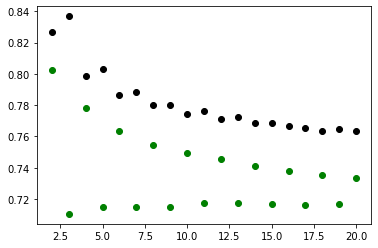

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 2 (RANDOM OVER-SAMPLING):

2 : [0.9983365335259786, 0.864471403812825]
3 : [0.9631304537936541, 0.827105719237435]
4 : [0.9630615387540161, 0.827105719237435]
5 : [0.9352887777798902, 0.7937435008665511]
6 : [0.9350392578087869, 0.7942461005199307]
7 : [0.9117364688884242, 0.7654939341421144]
8 : [0.9112588163723123, 0.767157712305026]
9 : [0.8916679340696945, 0.7420623916811092]
10 : [0.8908647174008099, 0.745580589254766]
11 : [0.8745271002452425, 0.722894280762565]
12 : [0.8731939506853482, 0.7297400346620451]
13 : [0.8601167278188627, 0.7096187175043328]
14 : [0.8588786334860554, 0.7195840554592721]
15 : [0.8478783673314195, 0.7020797227036395]
16 : [0.8457776468127982, 0.7173483535528596]
17 : [0.8373224843634152, 0.7009705372616984]
18 : [0.8351385905210927, 0.7177296360485269]
19 : [0.8283564000684398, 0.7031542461005199]
20 : [0.8261725062261174, 0.722842287694974]


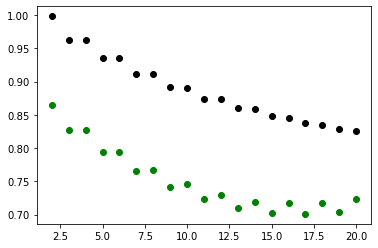

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 3 (TOMEK):

2 : [0.9368026417505619, 0.9011265164644714]
3 : [0.9381074305937236, 0.8894627383015598]
4 : [0.9234777091125201, 0.9046447140381283]
5 : [0.9245456698437381, 0.8992027729636048]
6 : [0.9189198850713389, 0.9068110918544194]
7 : [0.9196124955874008, 0.9030849220103986]
8 : [0.9165694777716709, 0.9076776429809359]
9 : [0.9172710251976174, 0.9051819757365684]
10 : [0.9154836432206835, 0.9082495667244368]
11 : [0.9157874981567623, 0.9065684575389948]
12 : [0.914567609957505, 0.9089774696707106]
13 : [0.9150278608165655, 0.908214904679376]
14 : [0.9139018101710972, 0.9098786828422877]
15 : [0.9144380247641772, 0.9091161178509533]
16 : [0.9135085861361717, 0.9101213171577123]
17 : [0.9137677565228272, 0.9097920277296361]
18 : [0.9130796144617076, 0.9107625649913345]
19 : [0.9134102801274403, 0.9105372616984402]
20 : [0.9127042642465515, 0.9108665511265165]


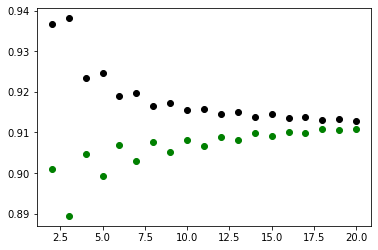

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 4 (SMOTE):

2 : [0.9625838862379043, 0.8227902946273831]
3 : [0.9225656356343035, 0.7592374350086655]
4 : [0.920476797019068, 0.7891681109185442]
5 : [0.8943271040474515, 0.744055459272097]
6 : [0.8972595578030836, 0.7685615251299827]
7 : [0.8779395828976635, 0.7334142114384749]
8 : [0.8818463527309367, 0.7537954939341421]
9 : [0.8665804832607745, 0.7258578856152513]
10 : [0.8706179540312922, 0.7447487001733102]
11 : [0.8575383547841295, 0.7202599653379549]
12 : [0.8614166080492767, 0.7374870017331022]
13 : [0.8505636774966255, 0.7156152512998267]
14 : [0.8543753921028118, 0.7314558058925477]
15 : [0.8448888804395354, 0.711369150779896]
16 : [0.8482181897682554, 0.7266897746967071]
17 : [0.8396323263816278, 0.7083362218370884]
18 : [0.8426075549894488, 0.7228249566724436]
19 : [0.8356043611338188, 0.7064818024263432]
20 : [0.8381589703617802, 0.7188041594454073]


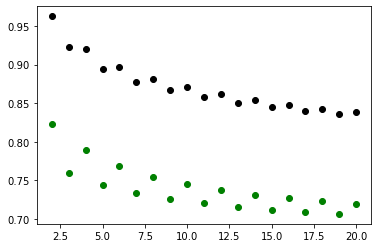

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 5 (NEARMISS):

2 : [0.8699244801883091, 0.3676429809358752]
3 : [0.8877991369164379, 0.33244367417677645]
4 : [0.8533248332679482, 0.3798786828422877]
5 : [0.8654864652805021, 0.35594454072790294]
6 : [0.8454295802275402, 0.3866897746967071]
7 : [0.8559729305610043, 0.3711785095320624]
8 : [0.8406482934484112, 0.39575389948006934]
9 : [0.8492300902314633, 0.38369150779896016]
10 : [0.8371910553158102, 0.4019410745233969]
11 : [0.8435170655158886, 0.392998266897747]
12 : [0.8343468026677129, 0.40904679376083186]
13 : [0.8399862691251471, 0.3985961871750433]
14 : [0.8318703413103178, 0.41223570190641246]
15 : [0.8368723028638682, 0.40173310225303294]
16 : [0.8295655158885837, 0.4127209705372617]
17 : [0.8349597881522166, 0.40694974003466206]
18 : [0.828118870145155, 0.4162218370883882]
19 : [0.8329246763436642, 0.41081455805892547]
20 : [0.8267948214986269, 0.4193414211438475]


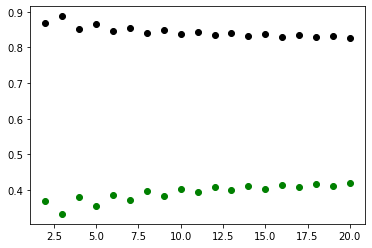

In [53]:
from sklearn.neighbors import KNeighborsClassifier


for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    
    K = []
    training = []
    test = []
    scores = {}
  
    # we will the run the algorithm for several k values and conclude which value suits our data the best
    for k in range(2, 21):
        clf = KNeighborsClassifier(n_neighbors = k)
        clf.fit(X_train_list[i], y_train_list[i])

        training_score = clf.score(X_train_list[i], y_train_list[i])
        test_score = clf.score(X_test, y_test)
        K.append(k)

        training.append(training_score)
        test.append(test_score)
        scores[k] = [training_score, test_score]
    
    
    for keys, values in scores.items():
        print(keys, ':', values)
        
    
    # for overlapping scatter plots
    plt.scatter(K, training, color ='k')
    plt.scatter(K, test, color ='g')
    plt.show()
    
    
    
#     clf_dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0) 
#     clf_dtc.fit(X_train_list[i], y_train_list[i])
        
#     pred = clf_dtc.predict(X_test)
#     print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
#     print("Classification report:\n")
#     print(classification_report(y_test,pred))
    
#     print("Confusion Matrix:") 
#     ConfusionMatrixDisplay.from_estimator(clf_dtc, X_train_list[i], y_train_list[i], cmap='inferno')
#     plt.show()
#     print("\n")


---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 1 (RANDOM UNDER-SAMPLING):

Model accuracy score: 0.7334
Classification report:

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     52564
           1       0.21      0.74      0.33      5136

    accuracy                           0.73     57700
   macro avg       0.59      0.74      0.58     57700
weighted avg       0.90      0.73      0.79     57700

Confusion Matrix:


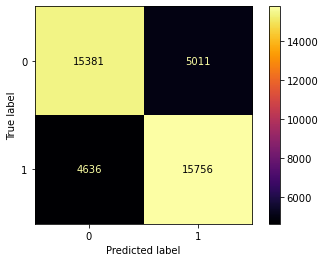

In [54]:
i = 1
k = 20
print("---------------------------------------------------------------------------")
print(f"Model with training data {i} ({data_desc[i]}):\n".upper())

clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(X_train_list[i], y_train_list[i])

pred = clf.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
print("Classification report:\n")
print(classification_report(y_test,pred))

print("Confusion Matrix:") 
ConfusionMatrixDisplay.from_estimator(clf, X_train_list[i], y_train_list[i], cmap='inferno')
plt.show()
print("\n")


In [55]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train_list[i], y_train_list[i])
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 29


We have found the best parameters for our training_data1 for performing KNN on it. The same can be done for all datasets.

Model accuracy score: 0.7190
Classification report:

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     52564
           1       0.21      0.77      0.33      5136

    accuracy                           0.72     57700
   macro avg       0.59      0.74      0.58     57700
weighted avg       0.90      0.72      0.78     57700

Confusion Matrix:


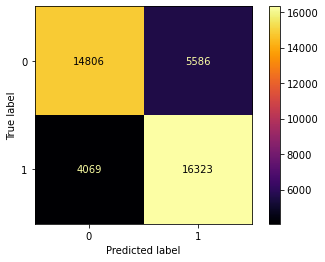

In [56]:
clf_knn = KNeighborsClassifier(n_neighbors = 29, p=1, leaf_size=1)
clf_knn.fit(X_train_list[i], y_train_list[i])

pred = clf_knn.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
print("Classification report:\n")
print(classification_report(y_test,pred))

print("Confusion Matrix:") 
ConfusionMatrixDisplay.from_estimator(clf_knn, X_train_list[i], y_train_list[i], cmap='inferno')
plt.show()
print("\n")

### Naive Bayes

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

Model accuracy score: 0.8457
Classification report:

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     52564
           1       0.27      0.44      0.34      5136

    accuracy                           0.85     57700
   macro avg       0.61      0.66      0.62     57700
weighted avg       0.88      0.85      0.86     57700

Confusion Matrix:


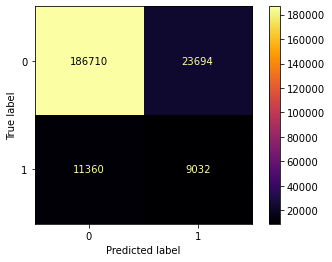



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 1 (RANDOM UNDER-SAMPLING):

Model accuracy score: 0.7853
Classification report:

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     52564
           1       0.23      0.61      0.33      5136

    accuracy                           0.79     57700
   macro avg       0.59      0.71      0.60     57700
weighted avg       0.89      0.79      0.82     57700

Confusion Matrix:


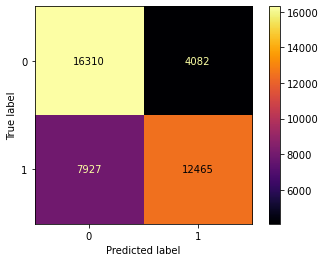



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 2 (RANDOM OVER-SAMPLING):

Model accuracy score: 0.7842
Classification report:

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     52564
           1       0.23      0.61      0.33      5136

    accuracy                           0.78     57700
   macro avg       0.59      0.71      0.60     57700
weighted avg       0.89      0.78      0.82     57700

Confusion Matrix:


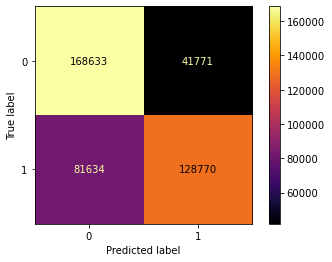



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 3 (TOMEK):

Model accuracy score: 0.8423
Classification report:

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     52564
           1       0.27      0.45      0.34      5136

    accuracy                           0.84     57700
   macro avg       0.61      0.67      0.62     57700
weighted avg       0.88      0.84      0.86     57700

Confusion Matrix:


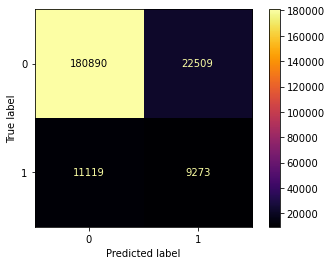



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 4 (SMOTE):

Model accuracy score: 0.7148
Classification report:

              precision    recall  f1-score   support

           0       0.96      0.72      0.82     52564
           1       0.19      0.70      0.30      5136

    accuracy                           0.71     57700
   macro avg       0.58      0.71      0.56     57700
weighted avg       0.89      0.71      0.77     57700

Confusion Matrix:


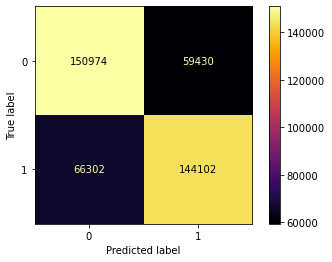



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 5 (NEARMISS):

Model accuracy score: 0.3530
Classification report:

              precision    recall  f1-score   support

           0       0.93      0.31      0.47     52564
           1       0.10      0.75      0.17      5136

    accuracy                           0.35     57700
   macro avg       0.51      0.53      0.32     57700
weighted avg       0.85      0.35      0.44     57700

Confusion Matrix:


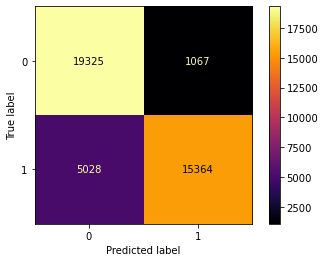

In [58]:
from sklearn.naive_bayes import GaussianNB

for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    
    clf_gnb = GaussianNB()
    pred = clf_gnb.fit(X_train_list[i], y_train_list[i]).predict(X_test)
    
    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
    print("Classification report:\n")
    print(classification_report(y_test,pred))
    
    print("Confusion Matrix:") 
    ConfusionMatrixDisplay.from_estimator(clf_gnb, X_train_list[i], y_train_list[i], cmap='inferno')
    plt.show()
    print("\n")


ComplementNB implements the complement naive Bayes (CNB) algorithm. CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly suited for imbalanced data sets. Specifically, CNB uses statistics from the complement of each class to compute the model’s weights. 

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

Model accuracy score: 0.7707
Classification report:

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     52564
           1       0.21      0.58      0.31      5136

    accuracy                           0.77     57700
   macro avg       0.58      0.68      0.59     57700
weighted avg       0.88      0.77      0.81     57700

Confusion Matrix:


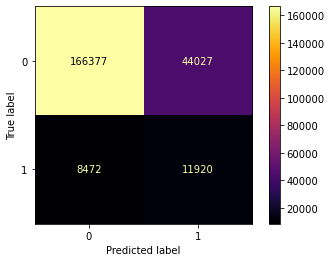



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 1 (RANDOM UNDER-SAMPLING):

Model accuracy score: 0.7711
Classification report:

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     52564
           1       0.21      0.58      0.31      5136

    accuracy                           0.77     57700
   macro avg       0.58      0.68      0.59     57700
weighted avg       0.88      0.77      0.81     57700

Confusion Matrix:


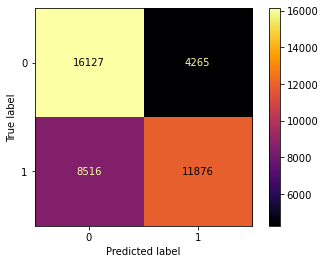



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 2 (RANDOM OVER-SAMPLING):

Model accuracy score: 0.7702
Classification report:

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     52564
           1       0.21      0.58      0.31      5136

    accuracy                           0.77     57700
   macro avg       0.58      0.68      0.59     57700
weighted avg       0.88      0.77      0.81     57700

Confusion Matrix:


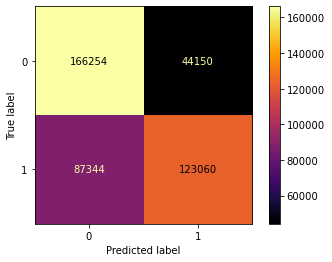



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 3 (TOMEK):

Model accuracy score: 0.7673
Classification report:

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     52564
           1       0.21      0.58      0.31      5136

    accuracy                           0.77     57700
   macro avg       0.58      0.68      0.58     57700
weighted avg       0.88      0.77      0.81     57700

Confusion Matrix:


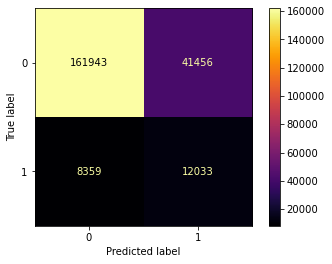



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 4 (SMOTE):

Model accuracy score: 0.7303
Classification report:

              precision    recall  f1-score   support

           0       0.95      0.74      0.83     52564
           1       0.19      0.63      0.29      5136

    accuracy                           0.73     57700
   macro avg       0.57      0.69      0.56     57700
weighted avg       0.89      0.73      0.79     57700

Confusion Matrix:


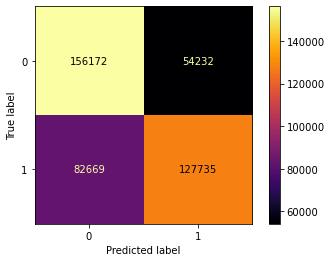



---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 5 (NEARMISS):

Model accuracy score: 0.4719
Classification report:

              precision    recall  f1-score   support

           0       0.94      0.45      0.61     52564
           1       0.11      0.72      0.19      5136

    accuracy                           0.47     57700
   macro avg       0.53      0.58      0.40     57700
weighted avg       0.87      0.47      0.57     57700

Confusion Matrix:


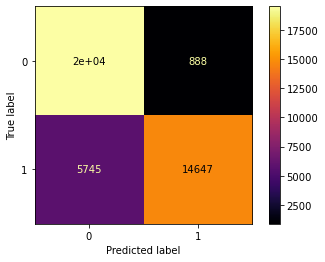

In [63]:
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler

for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    
    #since ComplementNB does not take -ve values, we scale them to 0 to 1 range
    scaler = MinMaxScaler()
    X_train_temp = scaler.fit_transform(X_train_list[i])
    X_test_temp = scaler.transform(X_test)
    
    clf_cnb = ComplementNB()
    pred = clf_cnb.fit(X_train_temp, y_train_list[i]).predict(X_test_temp)
    
    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
    print("Classification report:\n")
    print(classification_report(y_test,pred))
    
    print("Confusion Matrix:") 
    ConfusionMatrixDisplay.from_estimator(clf_cnb, X_train_temp, y_train_list[i], cmap='inferno')
    plt.show()
    print("\n")


### Support Vector Machine (SVM)

In [51]:
# from sklearn import svm
# from sklearn.model_selection import GridSearchCV


# for i in range(len(X_train_list)):
#     print("---------------------------------------------------------------------------")
#     print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    
#     clf_svm = svm.SVC(kernel='linear', C = 1.0) # Linear Kernel
#     clf_svm.fit(X_train_list[i], y_train_list[i])
        
#     pred = clf_svm.predict(X_test)
#     print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
#     print("Classification report:\n")
#     print(classification_report(y_test,pred))
    
#     print("Confusion Matrix:") 
#     ConfusionMatrixDisplay.from_estimator(clf_svm, X_train_list[i], y_train_list[i], cmap='inferno')
#     plt.show()
#     print("\n")


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC()
model.fit(X_train_list[0], y_train_list[0])

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

# #Create a svm Classifier and hyper parameter tuning 
# clf_svm = svm.SVC() 
  
# # defining parameter range
# param_grid = {'C': [ 1, 10, 100, 1000,10000], 
#               'gamma': [1,0.1,0.01,0.001,0.0001],
#               'kernel': ['rbf']} 
  
# grid = GridSearchCV(clf_svm, param_grid, refit = True, verbose = 1,cv=15)
  
# # fitting the model for grid search
# grid_search=grid.fit(X_train_list[0], y_train_list[0])